In [3]:
import numpy as np

# Create monkey patches
np.float = float
np.int = int
np.object = object
np.bool = bool

In [4]:
import spacy
spacy_nlp = spacy.load("en_core_web_sm")

import utility_functions as utils
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from spacy.lang.en.stop_words import STOP_WORDS

importlib.reload(utils)

custom_stop_words = list(STOP_WORDS)  # Existing stop words
custom_stop_words.extend(["ll", "ve", "'em", "em", "ho", "fo", "ah", "de"])  # Tokens which doesn't really make sense to have them.

In [5]:
df = pd.read_excel('/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Excel/baseline_data_w_topics_w_features.xlsx', engine='openpyxl')

In [6]:
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')

In [11]:
average_tempo_by_coast_year = df.groupby(['Release Year', 'Coast'])['Tempo1'].mean().reset_index()
overall_mean_tempo = df.groupby('Release Year')['Tempo1'].mean().reset_index()
overall_mean_tempo.rename(columns={'Tempo1': 'Overall Average Tempo'}, inplace=True)

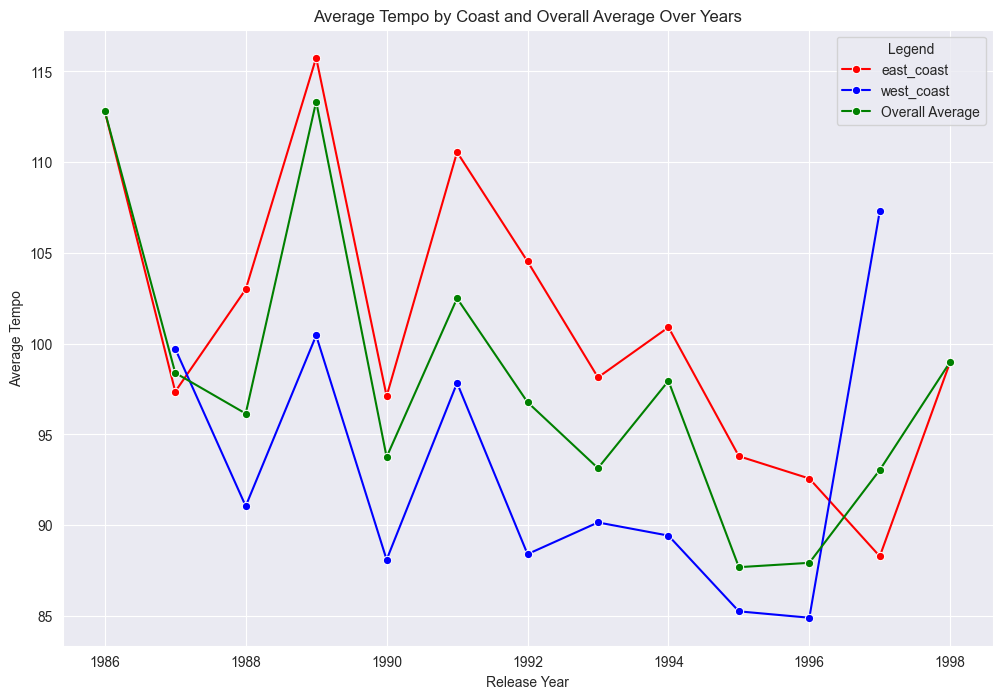

In [12]:
plt.figure(figsize=(12, 8))

# Plot the average tempo by coast
sns.lineplot(data=average_tempo_by_coast_year, x='Release Year', y='Tempo1', hue='Coast', palette={'east_coast': 'red', 'west_coast': 'blue'}, marker='o')

# Plot the overall average tempo per year
sns.lineplot(data=overall_mean_tempo, x='Release Year', y='Overall Average Tempo', color='green', marker='o', label='Overall Average')

plt.title('Average Tempo by Coast and Overall Average Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo')
plt.legend(title='Legend')
plt.grid(True)
plt.savefig('coast_topic_contribution_with_overall.png', dpi=300, bbox_inches='tight')
plt.show()